# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [4]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [5]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

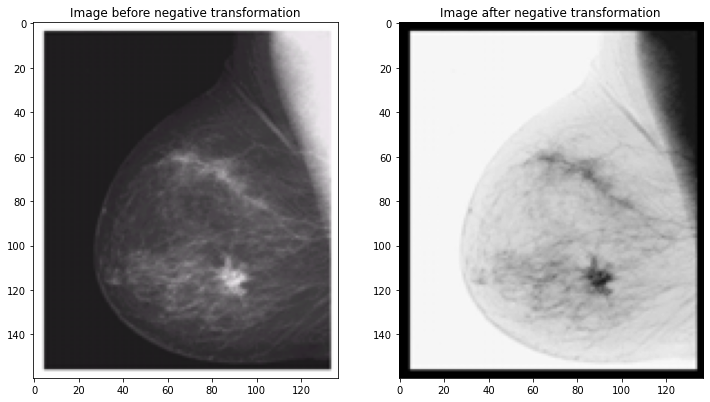

In [69]:
'''
1
Negative Transformation
'''
# Define function ‘Negative’ that apply Negative transformation for any image 
# and any threshold. What is the equation???
def Negative(image1,L):
    image=rgb2gray(image1)
    return (L-1) - image 

# def Negative(image1):
#     image=rgb2gray(image1)
#     return 1 - image 
 
#Read image ‘Picture1.png’
image = io.imread('imgs\picture1.png')[:,:,:3]


# Call the function and apply it on the image ‘Picture1.png’
negative_image=Negative(image,256)
# negative_image=Negative(image)

# Display the image before and after transformation in the same figure.
show_images([image,negative_image],['Image before negative transformation','Image after negative transformation']) 



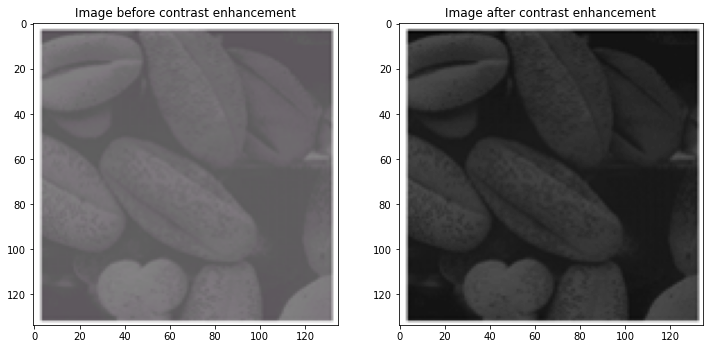

In [70]:
'''
2
Contrast Enhancement
'''

# Define function ‘Contrast_enhancement’ that Stretches the grey levels in the 
# range 0 to 100 into the range 50 – 200 and leaves other levels non changed. 
# What is the equation??? 
# hint: draw the spectrum of levels to know the equation, use for loops and if 
# statements(or matrix conditional indexing which is faster but a little tricky) in 
# the implementation.

# (r1,s1)=>(0,50) 
# (r2,s2)=>(100,200) 
# y=ax+b, slope=(y2-y1)/(x2-x1)=(200-50)/(100-0)=1.5,b=y when x=0 b=50
# y=1.5x+50

# np.where(condition,x,y)
# if condition is true, take x 
# else take y

def Contrast_enhancement(image1):
    image=rgb2gray(image1)
    image = np.where(image<=100,1.5*image+50,image)
    return image


# Read image ‘Picture2.png’
image = io.imread('imgs\picture2.png')[:,:,:3]

#Call the function and apply it on the image ‘Picture2.png’
stretched_image=Contrast_enhancement(image)

#Display the image before and after transformation in the same figure.
show_images([image,stretched_image],['Image before contrast enhancement','Image after contrast enhancement']) 


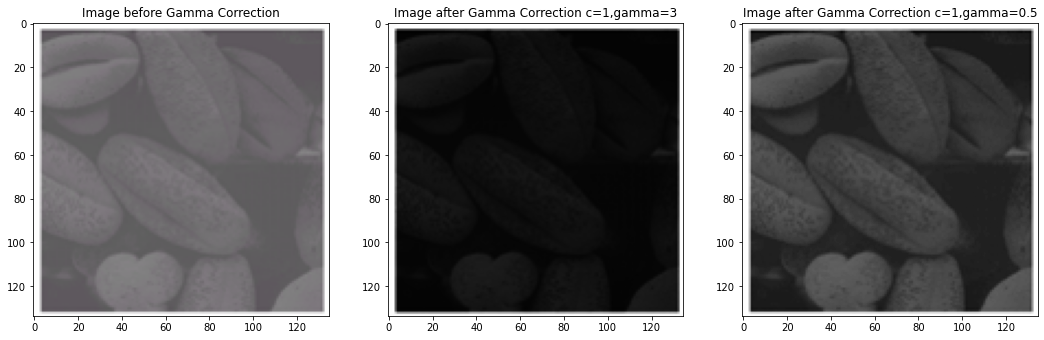

In [84]:
'''
3
Gamma Correction
'''
# Define function ‘Gamma_Correction’ that Stretches the grey levels according 
# to the gamma equation. (𝐴′ = 𝑐 ∗ 𝐴^𝛾) .
def Gamma_Correction(image1, c, gamma):
    image=rgb2gray(image1)
    image=c*(image**gamma)
    return image



#Read image ‘Picture2.png’
image = io.imread('imgs\picture2.png')[:,:,:3]

# Call the function with 𝑐=1 and 𝛾 = 3 and 𝑐=1 and 𝛾 = 0.5
image1=Gamma_Correction(image,1,3)
image2=Gamma_Correction(image,1,0.5)
# Display the images before and after transformation in the same figure.
show_images([image,image1,image2],['Image before Gamma Correction','Image after Gamma Correction c=1,gamma=3','Image after Gamma Correction c=1,gamma=0.5'])
# What is the effect of decreasing 𝛾 ?
# A [0:1] 
# when gamma<1 decreasing of gamma will increase A' -> brighter
# when gamma>1 increasing of gamma will decrease A' -> darker


[ 477 1871 2053 1848 1198 1072 1062 1052 1086 1122 1322 1513 1498 1320
 1098 1026  848  725  574  449  400  380  314  290  315  323  273  260
  262  257  263  229  232  221  223  222  216  183  187  210  185  186
  185  143  134  154  162  163  131  143  143  147  145  140  173  146
  124  154  149  171  133  168  153  154  151  168  151  174  179  178
  188  182  191  175  166  147  171  172  141  150  135  167  138  131
  125  119  135  105  127  117  117   98  103  106  126  118  120  127
  113  113  108  128  115  119  121  125  107  124  129  115  113  106
  106   86  111   96  109  105  104  114   96   99   91  116  100   97
  117  105  107  108  118  100  112   99  108  106  102  116  107  100
   90  110  108   84   87   93   92  105   94  102   96  101   94   93
   99   90  105   79   94   84   91   88   96   98   82   76   76   82
   67   90   80   59   57   55   58   56   55   49   44   58   48   47
   46   37   50   35   35   38   32   31   41   53   37   38   44   31
   32 

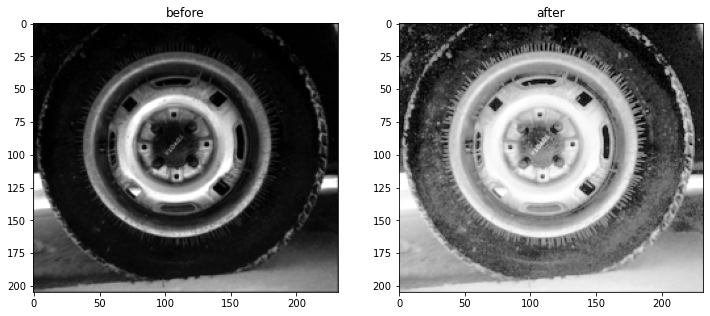

[   2   38  389 1245 1518 3628 3146 2041 1601 2415 1684 1506 1813 1660
 1390 1572 2662 1761 1387 1218 1287 1308 1288 1068  732  639  559  575
  504  502  518  476  490  599 1263  686  708  724  804  957 2770 1200
  973 1004 2434 1087  892 1737  995  813 1459  723  576  512  448  431
  377  600  296  266  354  154  121  113  113   91  163   58   53   50
   51   67   20   21   36   10   12   24   13   30    6   13   11   11
    9    9    9   19   13   16    6   18    6    5    7    6    6    8
   11    9    9    3    8    9    7    9    7    4    5   17    4    6
    4   11    7    2    6    2    8    2    2]
(121,)
224


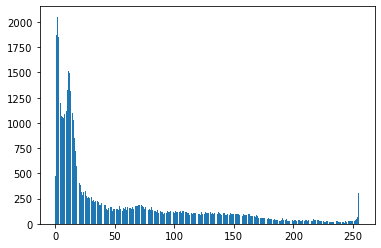

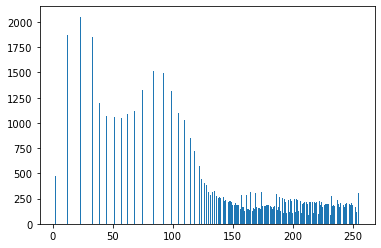

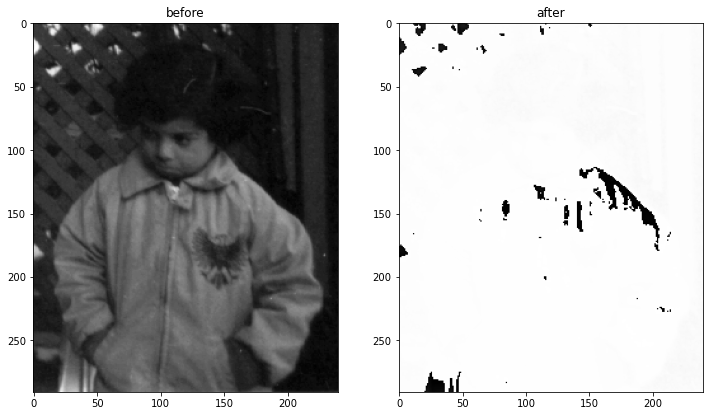

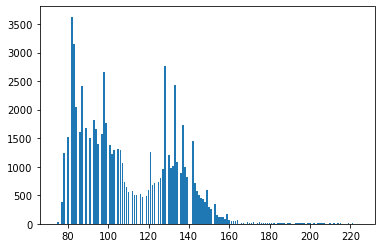

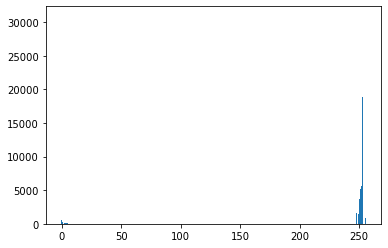

In [125]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
from skimage.exposure import histogram 
from matplotlib.pyplot import bar

def getImageWithHist(name,ext,nbins=256):
    pass

def showHist(img):
    # An "interface" to matplotlib.axes.Axes.hist() method
    plt.figure()
    imgHist = histogram(img, nbins=256)
    bar(imgHist[1].astype(np.uint8), imgHist[0], width=0.8, align='center')

    
def Histogram_Equalization(grey_image,G=256):
#     print (image)
#     grey_image=rgb2gray(image)
#     print (grey_image)

    N, M = grey_image.shape
#     print(grey_image.shape)
    H=np.zeros(G)
    H = histogram(grey_image,nbins=G)
#     print(H)
    
    cdf = np.cumsum(H)
#     print(cdf)
    
    mapping=np.zeros(G)
    mapping = np.round(((G-1) * cdf)//(N*M))
#     print(mapping)
    
#     temp_array=np.array(range(0,256))
#     print(temp_array)
    
    
    grey_image2=np.zeros((N,M),np.uint8)  
    for i in range(G):
#         grey_image2[grey_image==temp_array[i]]=mapping[i]
        grey_image2[grey_image==i]=mapping[i]
#    print(grey_image2)
    return grey_image2
    
    
# image = io.imread('imgs/picture2.png')
image = io.imread('imgs/tire.tif')
unique, counts = np.unique(image, return_counts=True)
print(counts)
print(unique.shape)
    
original_image=np.copy(image)
image1=Histogram_Equalization(image)
show_images([original_image,image1], ['before','after'])
showHist(original_image)
showHist(image1)

image2 = io.imread('imgs/pout.tif')
unique, counts = np.unique(image2, return_counts=True)
print(counts)
print(unique.shape)
print(np.max(unique))
    
original_image2=np.copy(image2)
image3=Histogram_Equalization(image2)
show_images([original_image2,image3], ['before','after'])
showHist(original_image2)
showHist(image3)

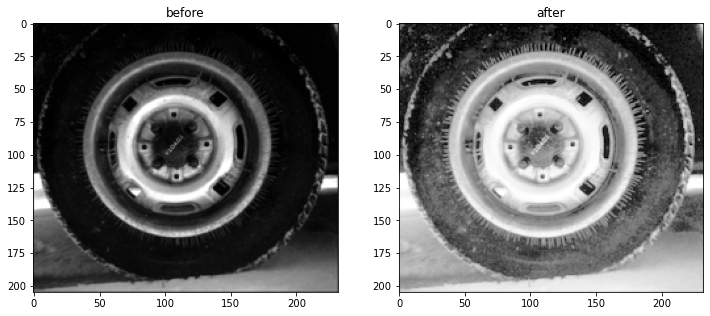

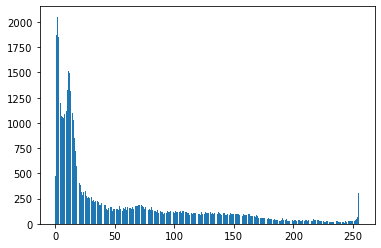

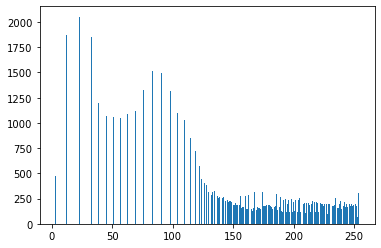

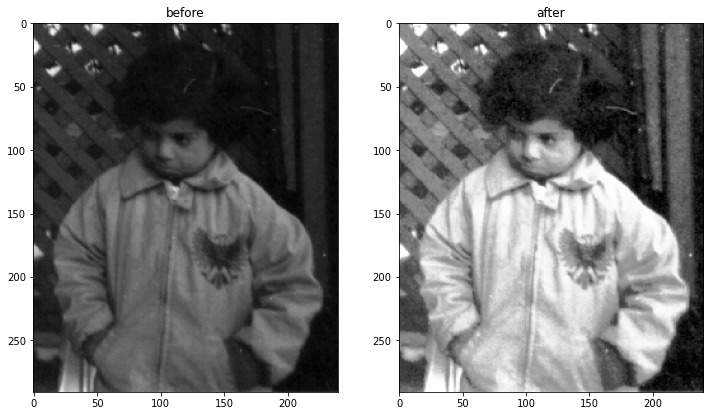

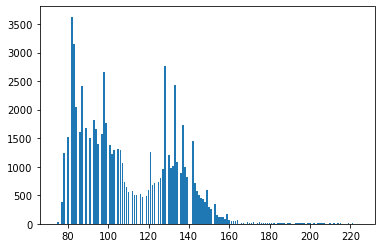

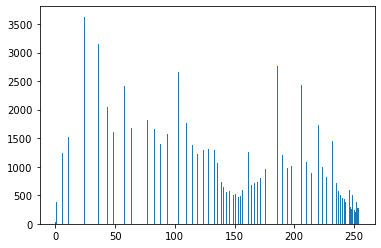

In [102]:
from skimage.exposure import equalize_hist

image_tire = io.imread('imgs/tire.tif')
# print(image)
image_tire_eq = equalize_hist(image, 256)
# print(image1)
show_images([image_tire,image_tire_eq], ['before','after'])
showHist(image_tire)
showHist(image_tire_eq*255)

image_pout = io.imread('imgs/pout.tif')
# print(image)
image_pout_eq = equalize_hist(image_pout, 256)
# print(image1)
show_images([image_pout,image_pout_eq], ['before','after'])
showHist(image_pout)
showHist(image_pout_eq*255)
    